In [12]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [73]:
def plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,clambda=None,telambda=None):
    #Getting the result dict
    if clambda!=None:
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).clambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          clambda,
                                  )
                )
    else:
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          telambda,
                                  )
                )
    
    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).erm/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="ate_noise={}".format(ate_noise),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

# Stage2 : Strategy1 : INV Reg

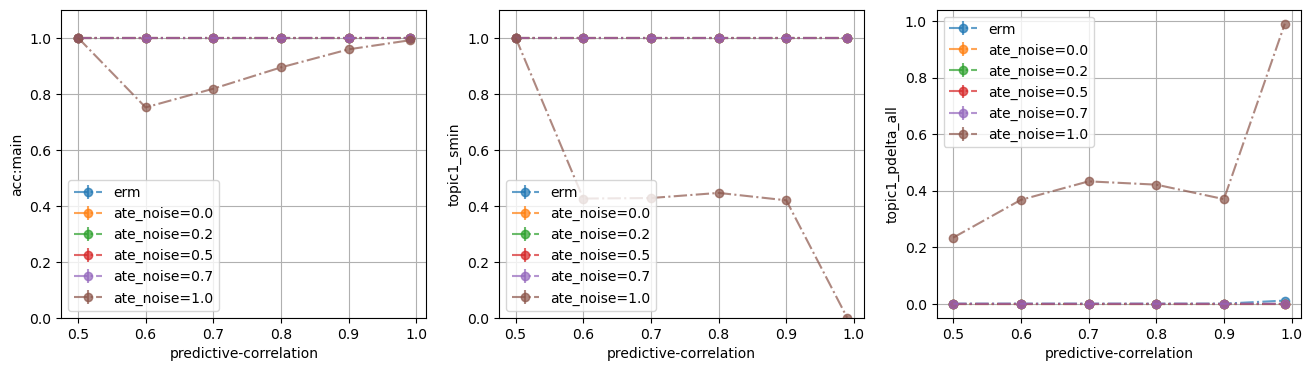

In [74]:
run_list=[1]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
main_enum=15
noise=0.0
clambda=1
    

plot_item_list=[
            "acc:main",
            "topic1_smin",
            "topic1_pdelta_all"
]
ate_noise_list=[0.0,0.2,0.5,0.7,1.0]


fig,ax = plt.subplots(1,len(plot_item_list))
for ate_noise in ate_noise_list:
    plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,clambda)

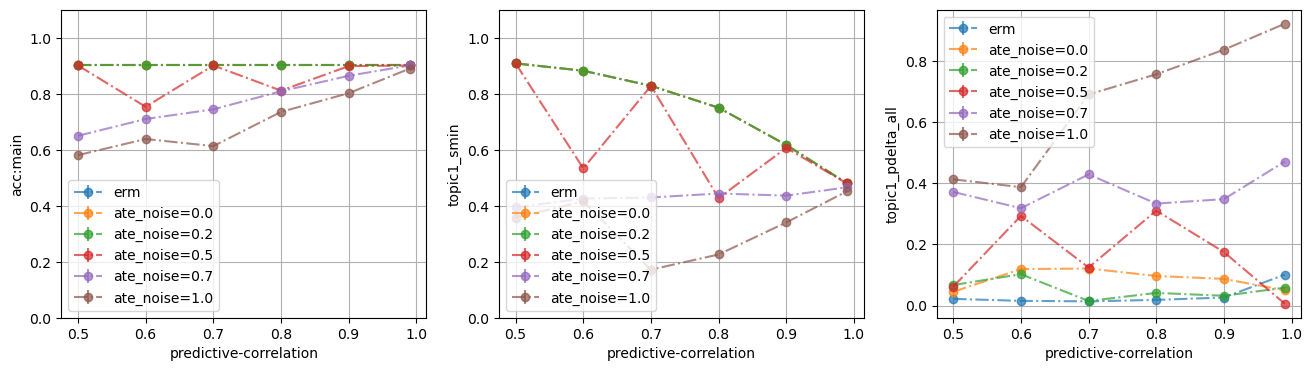

In [88]:
run_list=[1]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
main_enum=15
noise=0.1
clambda=10
    

plot_item_list=[
            "acc:main",
            "topic1_smin",
            "topic1_pdelta_all"
]
ate_noise_list=[0.0,0.2,0.5,0.7,1.0]


fig,ax = plt.subplots(1,len(plot_item_list))
for ate_noise in ate_noise_list:
    plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,clambda=clambda)

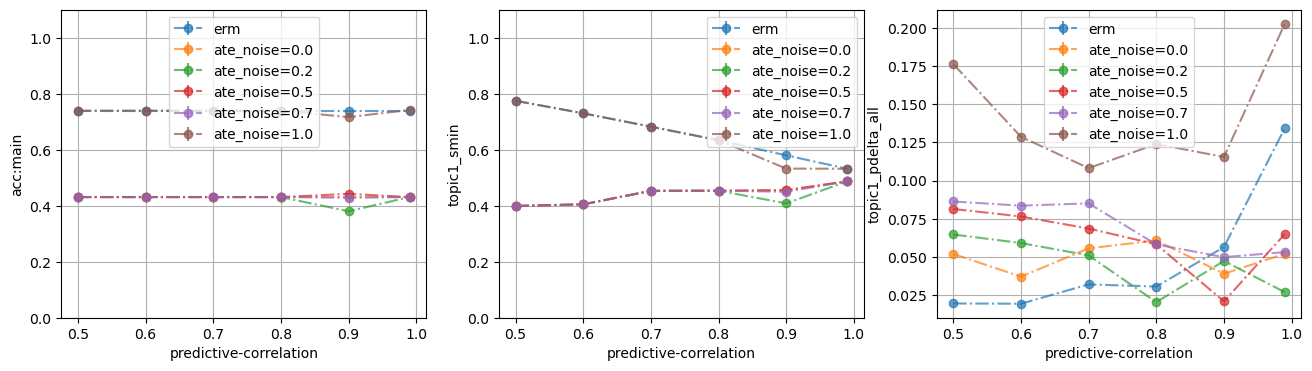

In [83]:
run_list=[1]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
main_enum=15
noise=0.3
clambda=1
    

plot_item_list=[
            "acc:main",
            "topic1_smin",
            "topic1_pdelta_all"
]
ate_noise_list=[0.0,0.2,0.5,0.7,1.0]


fig,ax = plt.subplots(1,len(plot_item_list))
for ate_noise in ate_noise_list:
    plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,clambda=clambda)

# Stage2: Strategy 2 : Prediction Reg

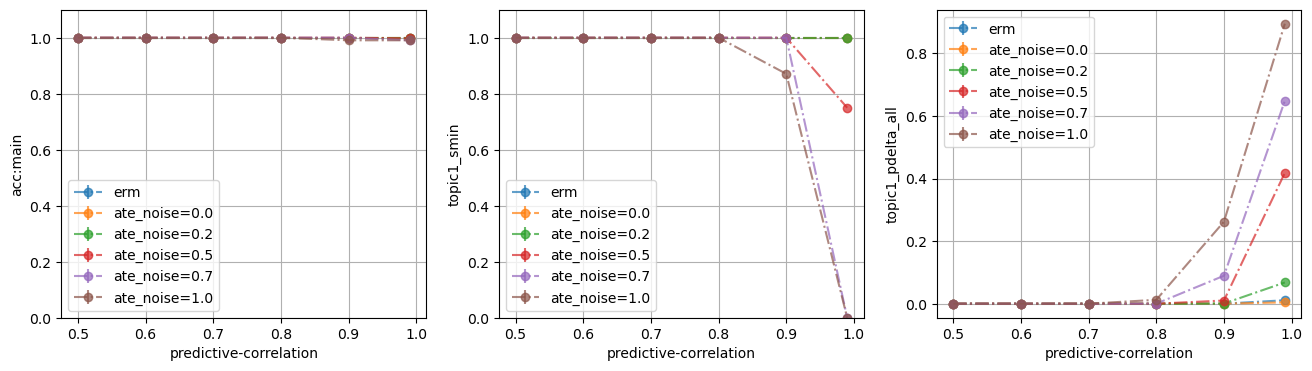

In [92]:
run_list=[1]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
main_enum=15
noise=0.0
telambda=0.1
    

plot_item_list=[
            "acc:main",
            "topic1_smin",
            "topic1_pdelta_all"
]
ate_noise_list=[0.0,0.2,0.5,0.7,1.0]


fig,ax = plt.subplots(1,len(plot_item_list))
for ate_noise in ate_noise_list:
    plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,telambda=telambda)

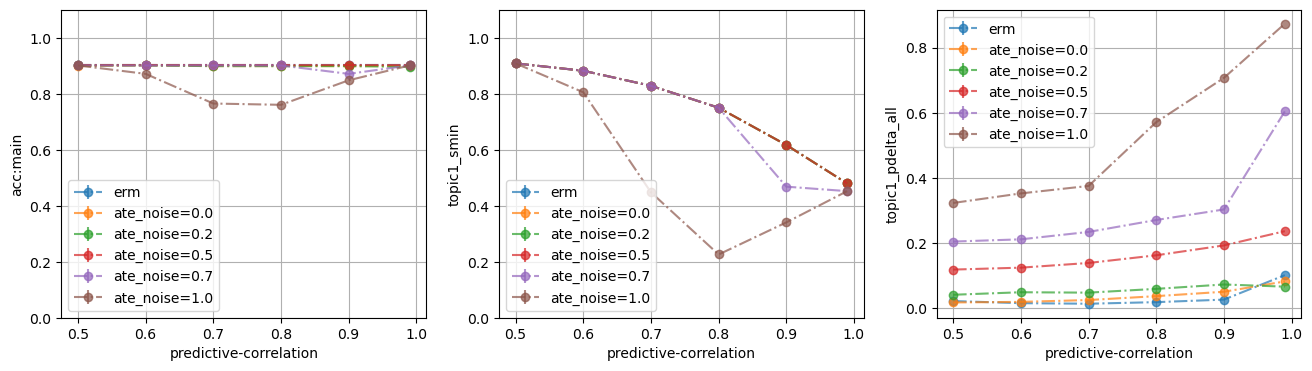

In [95]:
run_list=[1]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
main_enum=15
noise=0.1
telambda=1
    

plot_item_list=[
            "acc:main",
            "topic1_smin",
            "topic1_pdelta_all"
]
ate_noise_list=[0.0,0.2,0.5,0.7,1.0]


fig,ax = plt.subplots(1,len(plot_item_list))
for ate_noise in ate_noise_list:
    plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,telambda=telambda)

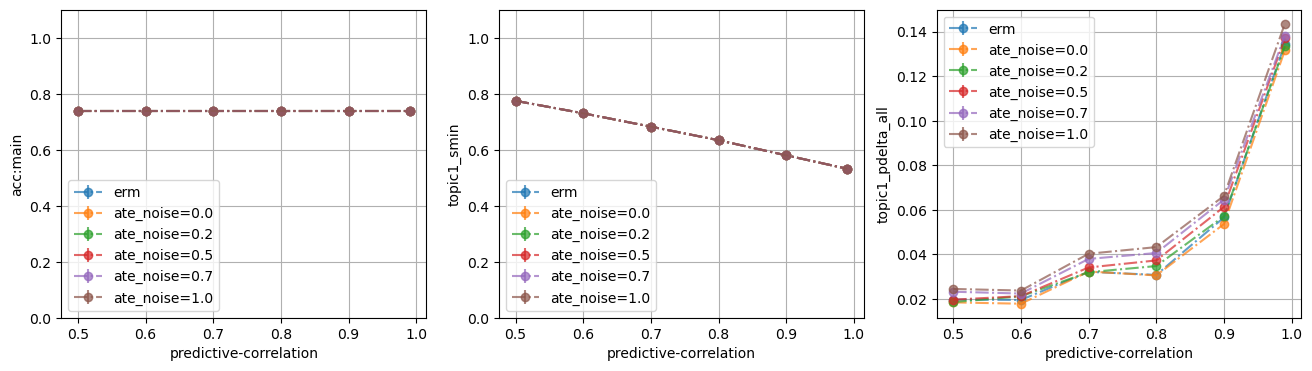

In [97]:
run_list=[1]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
main_enum=15
noise=0.3
telambda=0.01
    

plot_item_list=[
            "acc:main",
            "topic1_smin",
            "topic1_pdelta_all"
]
ate_noise_list=[0.0,0.2,0.5,0.7,1.0]


fig,ax = plt.subplots(1,len(plot_item_list))
for ate_noise in ate_noise_list:
    plot_one_result_pval_var(ax,result_dict,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,telambda=telambda)